In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import data
plt.style.use('fivethirtyeight')

In [27]:
# Use Git to update this one
file = os.path.abspath("/Users/ketch/Research/Projects/covid-data-sources/spain_data/COVID 19/nacional_covid19_rango_edad.csv")
df = pd.read_csv(file)

In [28]:
df.head()

,fecha,rango_edad,sexo,casos_confirmados,hospitalizados,ingresos_uci,fallecidos
0,2020-03-23,0-9,ambos,129,34,1,0
1,2020-03-23,10-19,ambos,221,15,0,1
2,2020-03-23,20-29,ambos,1285,183,8,4
3,2020-03-23,30-39,ambos,2208,365,15,3
4,2020-03-23,40-49,ambos,2919,663,40,9


In [29]:
age_groups = df.rango_edad.unique()
age_groups

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80 y +', 'Total', '80-89', '90 y +'], dtype=object)

In [30]:
age_groups = np.hstack((age_groups[:8],age_groups[-2:]))
age_groups

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80-89', '90 y +'], dtype=object)

In [31]:
cases = []
hospitalizations = []
icus = []
deaths = []
for group in age_groups:
    rows = df.loc[(df['rango_edad'] == group) & (df['sexo']=='ambos')]# & df['fecha']=='2020-04-16']
    cases.append(rows.casos_confirmados.max())
    hospitalizations.append(rows.hospitalizados.max())
    icus.append(rows.ingresos_uci.max())
    deaths.append(rows.fallecidos.max())
    
cases = np.array(cases)
hospitalizations = np.array(hospitalizations)
icus = np.array(icus)
deaths = np.array(deaths)

In [32]:
deaths

array([   3,    5,   30,   57,  182,  564, 1515, 4249, 7071, 3472])

In [33]:
cases

array([  725,  1306, 11914, 20125, 31342, 38439, 31576, 30478, 33838,
       15828])

In [34]:
print(sum(cases)/200210,sum(deaths)/20852)

1.0767244393386943 0.8223671590255132


In [35]:
np.sum(hospitalizations)/47e6

0.0018574255319148936

In [36]:
np.sum(deaths)

17148

# Raw totals

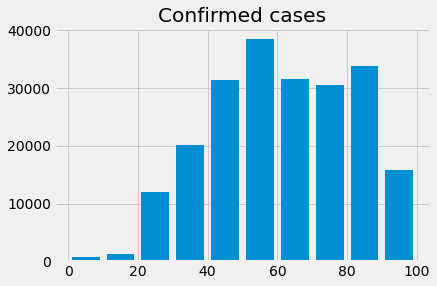

In [37]:
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(cases),width=8)
plt.title('Confirmed cases');

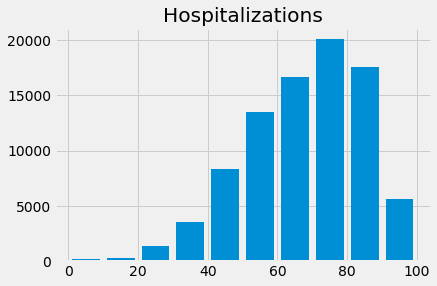

In [38]:
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(hospitalizations),width=8)
plt.title('Hospitalizations');

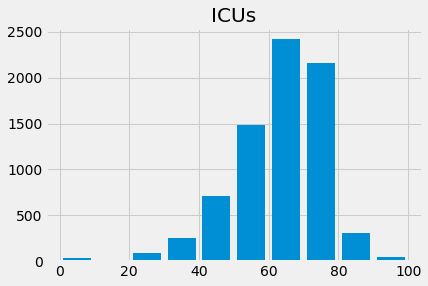

In [39]:
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(icus),width=8)
plt.title('ICUs');

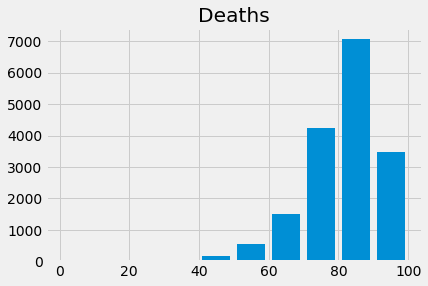

In [40]:
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(deaths),width=8)
plt.title('Deaths');

In [41]:
pa = data.age_distribution['Spain']
pop_decades = np.zeros(10)
for decade in range(9):
    pop_decades[decade] = pa[decade*2]+pa[decade*2+1]
pop_decades[9] = np.sum(pa[18:])
N = data.get_population('Spain')

In [42]:
deaths = deaths*20852/sum(deaths)  # Assume same proportions by age group in full set
cases = cases*200210/sum(cases)

In [43]:
sum(cases)

200210.00000000003

In [44]:
len(pa)

21

In [45]:
sum(pa[18:])

596388.0

In [46]:
pop_decades

array([4234487., 4736077., 4617599., 5901993., 7938499., 7046327.,
       5340654., 4015306., 2327453.,  596388.])

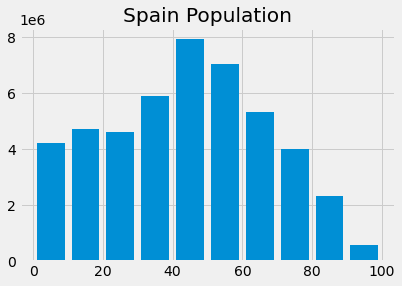

In [47]:
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(pop_decades),width=8)
plt.title('Spain Population');

In [48]:
len(pop_decades)

10

In [49]:
pop_decades[-4:]

array([5340654., 4015306., 2327453.,  596388.])

In [50]:
sum(pop_decades[-4:])/sum(pop_decades)

0.2626426690933417

# Overall risk
This isn't meaningful since the data doesn't include all deaths.

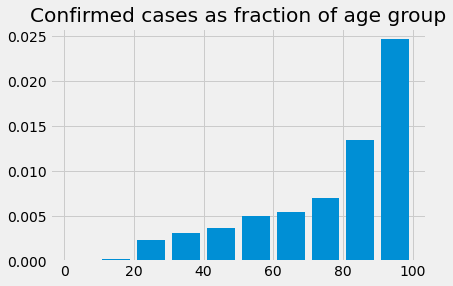

In [51]:
cc_risk = cases/pop_decades
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(cc_risk),width=8)
plt.title('Confirmed cases as fraction of age group');

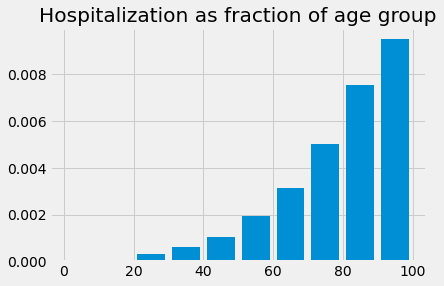

In [52]:
hosp_risk = hospitalizations/pop_decades
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(hosp_risk),width=8)
plt.title('Hospitalization as fraction of age group');

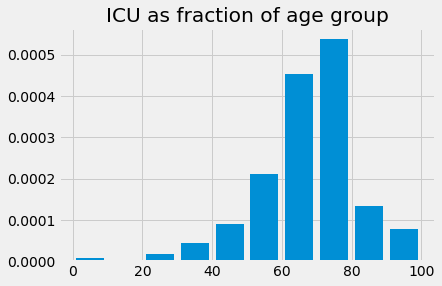

In [53]:
icu_risk = icus/pop_decades
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(icu_risk),width=8)
plt.title('ICU as fraction of age group');

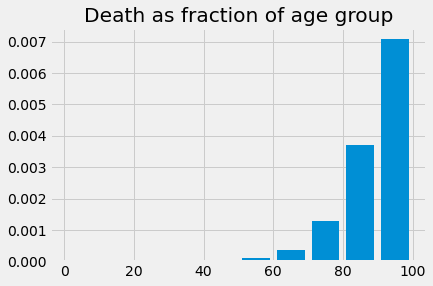

In [54]:
death_risk = deaths/pop_decades
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(death_risk),width=8)
plt.title('Death as fraction of age group');

# Relative risk

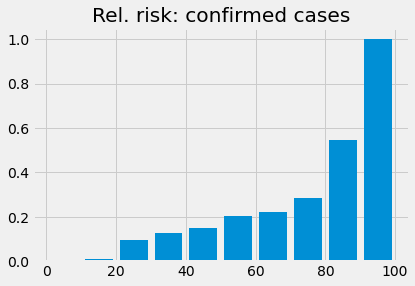

In [55]:
cc_risk = cases/pop_decades
rel_cc_risk = cc_risk/np.max(cc_risk)
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(rel_cc_risk),width=8)
plt.title('Rel. risk: confirmed cases');

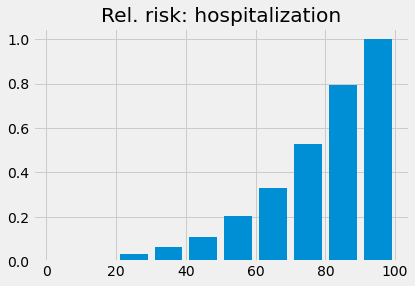

In [56]:
hosp_risk = hospitalizations/pop_decades
hosp_risk /= np.max(hosp_risk)
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(hosp_risk),width=8)
plt.title('Rel. risk: hospitalization');

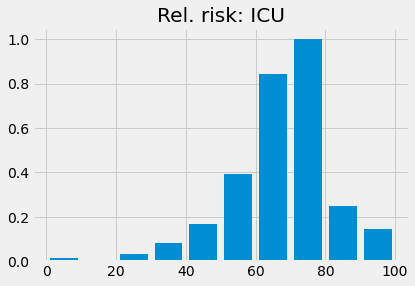

In [57]:
icu_risk = icus/pop_decades
icu_risk /= np.max(icu_risk)
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(icu_risk),width=8)
plt.title('Rel. risk: ICU');

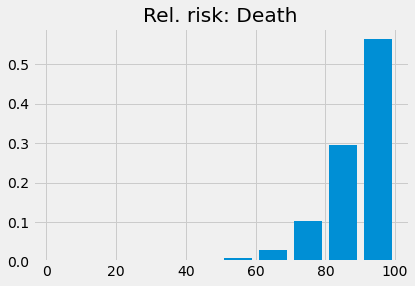

In [58]:
death_risk = deaths/pop_decades
death_risk /= np.sum(death_risk)
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(death_risk),width=8)
plt.title('Rel. risk: Death');

In [59]:
death_risk

array([6.86330145e-05, 1.02273678e-04, 6.29386847e-04, 9.35596933e-04,
       2.22098496e-03, 7.75405601e-03, 2.74808913e-02, 1.02513416e-01,
       2.94315098e-01, 5.63979663e-01])

In [60]:
ifr = np.array([0.0016,0.007,0.031, 0.084, 0.16, 0.6, 1.9, 4.3, 7.8])/100
ifr_low = np.array([0.000185,0.0015,0.014,0.041,0.076,0.34,1.1,2.5,3.8])/100
ifr_high = np.array([0.0249,0.050,0.092,0.185,0.32,1.3,3.9,8.4,13.3])/100
cfr = np.array([0.0026,0.0148,0.060,0.146,0.295,1.25,3.99,8.61,13.4])/100
rel_ifr = ifr/np.sum(ifr)
rel_ifr_low = ifr_low/np.sum(ifr)
rel_ifr_high = ifr_high/np.sum(ifr)
rel_cfr = cfr/np.sum(cfr)
# Relative IFR and relative CFR from Verity are visually indistinguishable

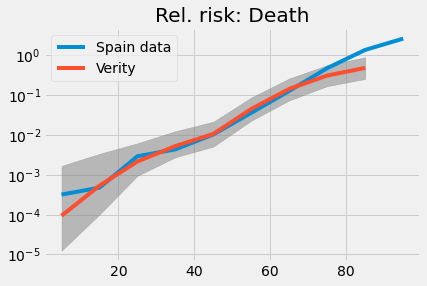

In [67]:
plt.semilogy(np.arange(len(death_risk))*10+5,death_risk/(death_risk[6]/rel_ifr[6]))
#plt.semilogy(np.arange(len(rel_ifr))*10+5,rel_ifr)
plt.semilogy(np.arange(len(rel_ifr))*10+5,rel_cfr)
plt.fill_between(np.arange(len(rel_ifr))*10+5,rel_ifr_low,rel_ifr_high,color='grey',alpha=0.5)
#plt.semilogy(np.arange(len(rel_ifr))*10+5,rel_ifr_high)
plt.legend(['Spain data','Verity']);
plt.title('Rel. risk: Death');
death_risk_spain = death_risk.copy()

Relative risk for younger groups is consistently lower than what Verity et. al. found.

Note that this is relative risk for those who are confirmed cases.  If the symptomatic fraction for young people is much lower than for older people, the relative risks will differ by even more.

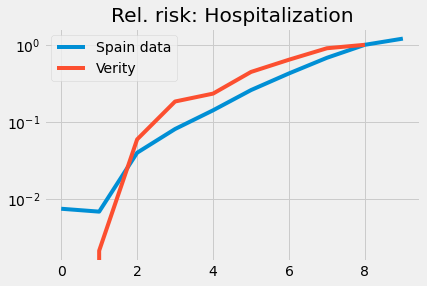

In [173]:
hosp_rates = np.array([0.,0.04,1.1,3.4,4.3,8.2,11.8,16.6,18.4])/100
hosp_rates /= np.max(hosp_rates)
hosp_risk /= hosp_risk[8]

plt.semilogy(hosp_risk)
plt.semilogy(hosp_rates)
plt.legend(['Spain data','Verity']);
plt.title('Rel. risk: Hospitalization');

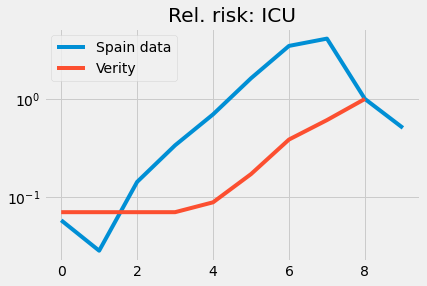

In [174]:
icu_rates = np.array([5,5,5,5,6.3,12.2,27.4,43.2,70.9])/100
icu_rates /= np.max(icu_rates)
icu_risk /= icu_risk[8]

plt.semilogy(icu_risk)
plt.semilogy(icu_rates)
plt.legend(['Spain data','Verity']);
plt.title('Rel. risk: ICU');

# US data (deaths only)

From https://www.cdc.gov/nchs/nvss/vsrr/covid_weekly/index.htm table 1.

In [175]:
# Age groups: <1, 1-4, 5-14, 15-24, ..., 75-84, 85+
deaths_us = np.array([0,2,1,10,103,247,633,1509,2512,3088,3251])
pops_us = np.array([3848208,15962067,41075169,42970800,45697774,41277888,41631699,42272636,30492316,15394374,6544503])

In [176]:
np.insert(np.arange(1,10)*10,0,2)

array([ 2, 10, 20, 30, 40, 50, 60, 70, 80, 90])

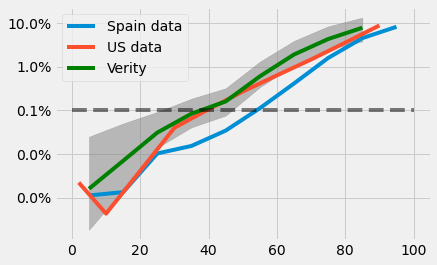

In [177]:
rel_risk_us = deaths_us/pops_us
rel_risk_us /= np.sum(deaths_us/pops_us)
fac = np.sum(ifr)*100
plt.semilogy(np.arange(len(death_risk_spain))*10+5,death_risk_spain*fac)
plt.semilogy(np.insert(np.arange(1,10)*10,0,2),rel_risk_us[1:]*fac)
plt.semilogy(np.arange(len(rel_ifr))*10+5,rel_ifr*fac,color='g')
plt.fill_between(np.arange(len(rel_ifr))*10+5,rel_ifr_low*fac,rel_ifr_high*fac,color='grey',alpha=0.5)
plt.legend(['Spain data','US data','Verity']);
ax = plt.gca(); ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.plot([0,100],[0.1,0.1],'--k',alpha=0.5);

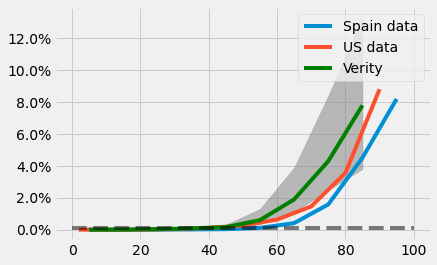

In [178]:
import matplotlib.ticker as mtick
rel_risk_us = deaths_us/pops_us
rel_risk_us /= np.sum(deaths_us/pops_us)
fac = np.sum(ifr)*100
plt.plot(np.arange(len(death_risk_spain))*10+5,death_risk_spain*fac)
plt.plot(np.insert(np.arange(1,10)*10,0,2),rel_risk_us[1:]*fac)
plt.plot(np.arange(len(rel_ifr))*10+5,rel_ifr*fac,color='g')
plt.fill_between(np.arange(len(rel_ifr))*10+5,rel_ifr_low*fac,rel_ifr_high*fac,color='grey',alpha=0.5)
plt.legend(['Spain data','US data','Verity']);
ax = plt.gca(); ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.plot([0,100],[0.1,0.1],'--k',alpha=0.5);

## For comparison: annual mortality in the US (2018)
From https://www.cdc.gov/nchs/products/databriefs/db355.htm

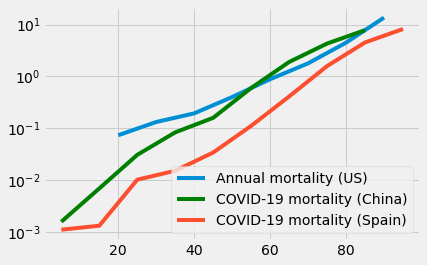

In [179]:
annual_mortality = np.array([74,133,195,402,886,1791,4473,13574])/1e5
plt.semilogy(np.arange(len(annual_mortality))*10+20,annual_mortality*100)
plt.semilogy(np.arange(len(rel_ifr))*10+5,rel_ifr*fac,color='g')
plt.plot(np.arange(len(death_risk_spain))*10+5,death_risk_spain*fac)
plt.legend(['Annual mortality (US)','COVID-19 mortality (China)', 'COVID-19 mortality (Spain)']);

In [124]:
age_groups

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80-89', '90 y +'], dtype=object)

# Time analysis of Spain data

Suggests that older patients die slightly sooner.

In [6]:
cases = []
hospitalizations = []
icus = []
deaths = []
for group in age_groups:
    rows = df.loc[(df['rango_edad'] == group) & (df['sexo']=='ambos')]# & df['fecha']=='2020-04-16']
    cases.append(np.diff(rows.casos_confirmados))
    hospitalizations.append(np.diff(rows.hospitalizados))
    icus.append(np.diff(rows.ingresos_uci))
    deaths.append(np.diff(rows.fallecidos))

In [18]:
from cycler import cycler
default_cycler = cycler(color='bgrcmyk')
plt.rc('axes', prop_cycle=default_cycler)

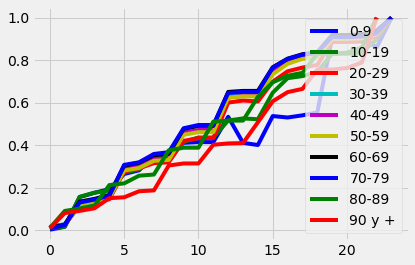

In [14]:
for case in cases[:]:
    plt.plot(np.cumsum(case)/np.cumsum(case)[-1])
plt.legend(age_groups)

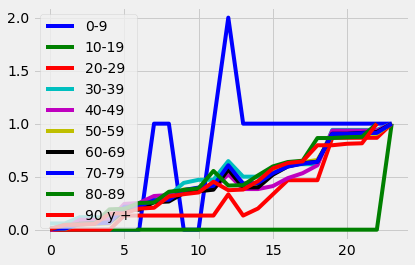

In [19]:
for death in deaths:
    plt.plot(np.cumsum(death)/np.cumsum(death)[-1])
plt.legend(age_groups)

# What can we say about undiagnosed cases?

If we assume the same fraction of each age group population has been exposed, then we see that the confirmed cases for the younger groups are a tiny fraction of all those exposed.  Let's assume the asymptomatic fraction is 60% for the 20-29 age group (based on the naval carrier data).

We suppose that the number of confirmed cases is:
$$
C_i = N_i \alpha_i \mu E
$$
where $E$ is the attack rate (and this is uniform across age groups), $N_i$ is the total population in age group $i$, $\alpha_i$ is the symptomatic fraction for that age group, and $\mu<1$ is a constant "detection ratio".
Then if we know $\alpha_i$ for one group, we have
$$
\mu E = C_i/(N_i \alpha_i)
$$
Here we'll assume that $\alpha_i=0.4$ for the 20-29 age group.  This is based on tests of soldiers on a US Navy aircraft carrier, in which 60% of the infected were asymptomatic.

In [76]:
muE20 = cases[2]/(pop_decades[2]*0.4)
muE20

0.0055951170972863284

Now we can compute the symptomatic fraction for each age group:
$$
\alpha_i = C_i/(N_i \mu E)
$$

In [77]:
cases/(pop_decades*muE20)

array([0.02805526, 0.04254947, 0.4       , 0.56921886, 0.66074796,
       0.92704484, 1.04957702, 1.33427425, 2.27572666, 3.72056791])

We know that $\alpha \le1$, so the values here imply that some assumption was wrong.  Most likely, $\mu$ varies with age group, probably because among the symptomatic cases, the fraction that are serious also goes up strongly with age.  Another issue is that not everyone on the naval carrier is in the 20-29 age group, so the measured value of $\alpha$ is an average over a few age groups.  But even if we use the 30-39 or 40-49 confirmed case fraction, we still predict $\alpha_i>2$ for the oldest group.

# Fraction of confirmed cases that are hospitalized

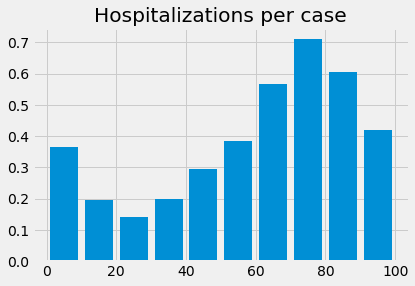

In [117]:
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(hospitalizations/cases),width=8)
plt.title('Hospitalizations per case');

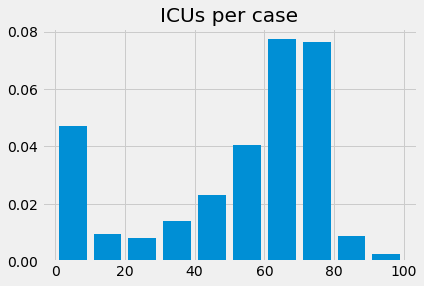

In [118]:
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(icus/cases),width=8)
plt.title('ICUs per case');

The high fractions for the youngest group are likely due to instinctive precautionary measures for children, as they are perceived to be more vulnerable to disease.

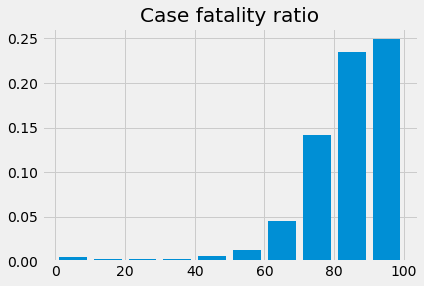

In [133]:
plt.bar(x=10*np.arange(len(age_groups))+5,height=np.array(deaths/cases),width=8)
plt.title('Case fatality ratio');

# What fraction of the real infections are being detected?

Here we assume Verity's IFRs by age group.

In [131]:
deaths[:-1]/cases[:-1]/ifr

array([295.50827423,  38.925652  ,   9.06259391,   3.53342043,
         3.71109746,   2.12496424,   2.37286708,   3.28770515,
         3.00519139])

According to this, about 1/3 of cases are detected, with a much lower fraction for people under 30.  The detected fraction is surprisingly consistent across age groups over 30.

In [132]:
ifr

array([1.6e-05, 7.0e-05, 3.1e-04, 8.4e-04, 1.6e-03, 6.0e-03, 1.9e-02,
       4.3e-02, 7.8e-02])

It's important to remember that deaths are under-counted by perhaps 1/3.  This will further lower the fraction of cases that is detected.